In [65]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.layers import Dropout
import pickle

#### Dataset


Load dataset + One-hot encoding + Normalization

In [49]:
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # One-hot encoding
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    # Normalize to [0,1]
    trainX = trainX.astype('float32') / 255.0
    testX = testX.astype('float32') / 255.0

    return trainX, trainY, testX, testY

#### Model

Imortant functions

In [50]:
def train(model):    
    trainX, trainY, testX, testY = load_dataset()

    results = model.fit(trainX, trainY, epochs=200, batch_size=512, validation_data=(testX, testY), verbose=0)

    return results

def evaluate(model):
    _, acc = model.evaluate(testX, testY, verbose=0)

    print(f"The model achieved a final accuracy of {acc*100:.2f}%")

def plot_results(results):
	plt.title('Cross Entropy Loss')
	plt.plot(results.history['loss'], color='blue', label='Training loss')
	plt.plot(results.history['val_loss'], color='orange', label='Validation/test loss')
	plt.show()

	plt.title('Classification Accuracy')
	plt.plot(results.history['accuracy'], color='blue', label='Training accuracy')
	plt.plot(results.history['val_accuracy'], color='orange', label='Validation/test accuracy')
	plt.show()

In [69]:
def save_model(filename, model):
    filename = './models/' + filename
    pickle.dump(model, open(filename, 'wb'))

def save_history(filename, results):
    filename = './history/' + filename
    pickle.dump(results.history, open(filename, 'wb'))

def load_model(filename):
    filename = './models/' + filename
    model = pickle.load(open(filename, 'rb'))
    return model

def load_history(filename):
    filename = './history/' + filename
    history = pickle.load(open(filename, 'rb'))
    return history

Baseline model

In [53]:
def baseline_model():
    # Create architecture 
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # Optimization method
    opt = SGD(learning_rate=0.001, momentum=0.9)

    # Compile model and choose loss type
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [56]:
model = baseline_model()
results = train(model)

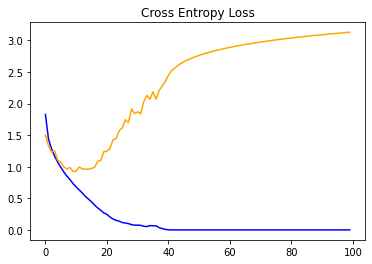

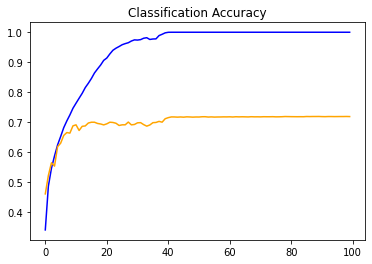

The model achieved a final accuracy of 71.82%


In [62]:
plot_results(results)
evaluate(model)

In [70]:
save_model('base_model', model)
save_history('base_model', results)

In [76]:
test = load_model('base_model')
history_test = load_history('base_model')

[1.499952793121338,
 1.3341110944747925,
 1.231519341468811,
 1.250896692276001,
 1.098757028579712,
 1.0711617469787598,
 0.9951909184455872,
 0.965298056602478,
 0.9875771403312683,
 0.9205739498138428,
 0.9330790042877197,
 0.9949928522109985,
 0.9653283953666687,
 0.9613861441612244,
 0.9588316679000854,
 0.9716053009033203,
 0.9919947385787964,
 1.0864280462265015,
 1.0967388153076172,
 1.2392531633377075,
 1.243506669998169,
 1.2927309274673462,
 1.4267878532409668,
 1.4461625814437866,
 1.5697811841964722,
 1.6148086786270142,
 1.7432564496994019,
 1.6966955661773682,
 1.91337251663208,
 1.8410745859146118,
 1.8686379194259644,
 1.836189866065979,
 2.0280463695526123,
 2.126880168914795,
 2.0679097175598145,
 2.1847996711730957,
 2.069645643234253,
 2.2078514099121094,
 2.2735037803649902,
 2.350332260131836,
 2.4472897052764893,
 2.516573190689087,
 2.5585575103759766,
 2.5973165035247803,
 2.6314761638641357,
 2.659420967102051,
 2.68468976020813,
 2.7049241065979004,
 2.72583